<a href="https://colab.research.google.com/github/sandheepgopinath/Code-Repository/blob/main/Deep_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auto Encoder

In [1]:
def print_distributions(number_of_neurons, data):
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  plt.figure(figsize=(20,20))

  for i in range(number_of_neurons):
    plt.subplot(8,number_of_neurons//8,i+1)
    sns.histplot(data[i])
    
def print_decoder_outputs(input,predictions,number):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,3))
  for i in range(number):
    plt.subplot(1,number,i+1)
    plt.axis='off'
    plt.imshow(input[i].reshape(28,28),cmap='gray')
  plt.figure(figsize=(10,3))
  for i in range(number):
    plt.subplot(1,number,i+1)
    plt.axis='off'
    plt.imshow(predictions[i].reshape(28,28),cmap='gray')




In [ ]:
# The motive here is to create an autoencoder

# We will be creating an encoder which will take as input a 32x32 flattened image and then reconstruct it
# using a single layer. 
import warnings
warnings.filterwarnings('ignore')
import keras
from keras import layers
n_dimension=32
input_image=keras.Input(shape=(784,))
encoded_image=layers.Dense(n_dimension,activation='relu')(input_image) # This layer will scale down the image to n_dimension
decoded_image=layers.Dense(784,activation='sigmoid')(encoded_image)

autoencoder_model=keras.Model(input_image,decoded_image)
autoencoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


#### Notes
We can see that the model takes as input a flattened image, compresses and encodes it and then reconstruct the image back in the third Dense layer. <br>
While doing the decompression, some information will be lost . 

In [ ]:
# Creating model for encoding

encoder=keras.Model(input_image,encoded_image)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Creating model for decoding
encoded_input=keras.Input(shape=(n_dimension,))
decoder=keras.Model(encoded_input,autoencoder_model.layers[-1](encoded_input))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Fitting the autoencoder model

autoencoder_model.compile(optimizer='adam',loss='binary_crossentropy')
encoder.compile(optimizer='adam',loss='binary_crossentropy')
decoder.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
import numpy as np
x_train = x_train/ 255.
x_test = x_test/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
autoencoder_model.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 3s 5ms/step - loss: 0.2744 - val_loss: 0.1854
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1686 - val_loss: 0.1528
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1440 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1283 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1179 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1107 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1056 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0972 - val_loss: 0.0952

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


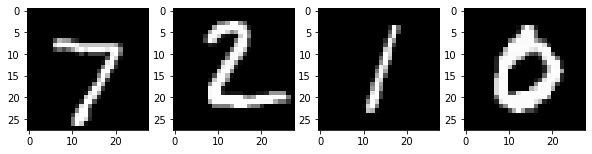

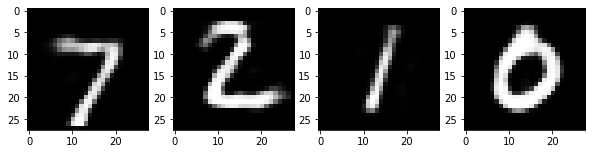

In [ ]:
print_decoder_outputs(x_test,decoded_imgs,4)

#### Printing the autoencoder outputs with inputs

In [ ]:
gaussian=[[] for i in range(32)] # Storing the outputs of individial neurons to different lists
for image in encoded_imgs:
  i=0
  for neuron_output in image:
    gaussian[i].append(neuron_output)
    i+=1


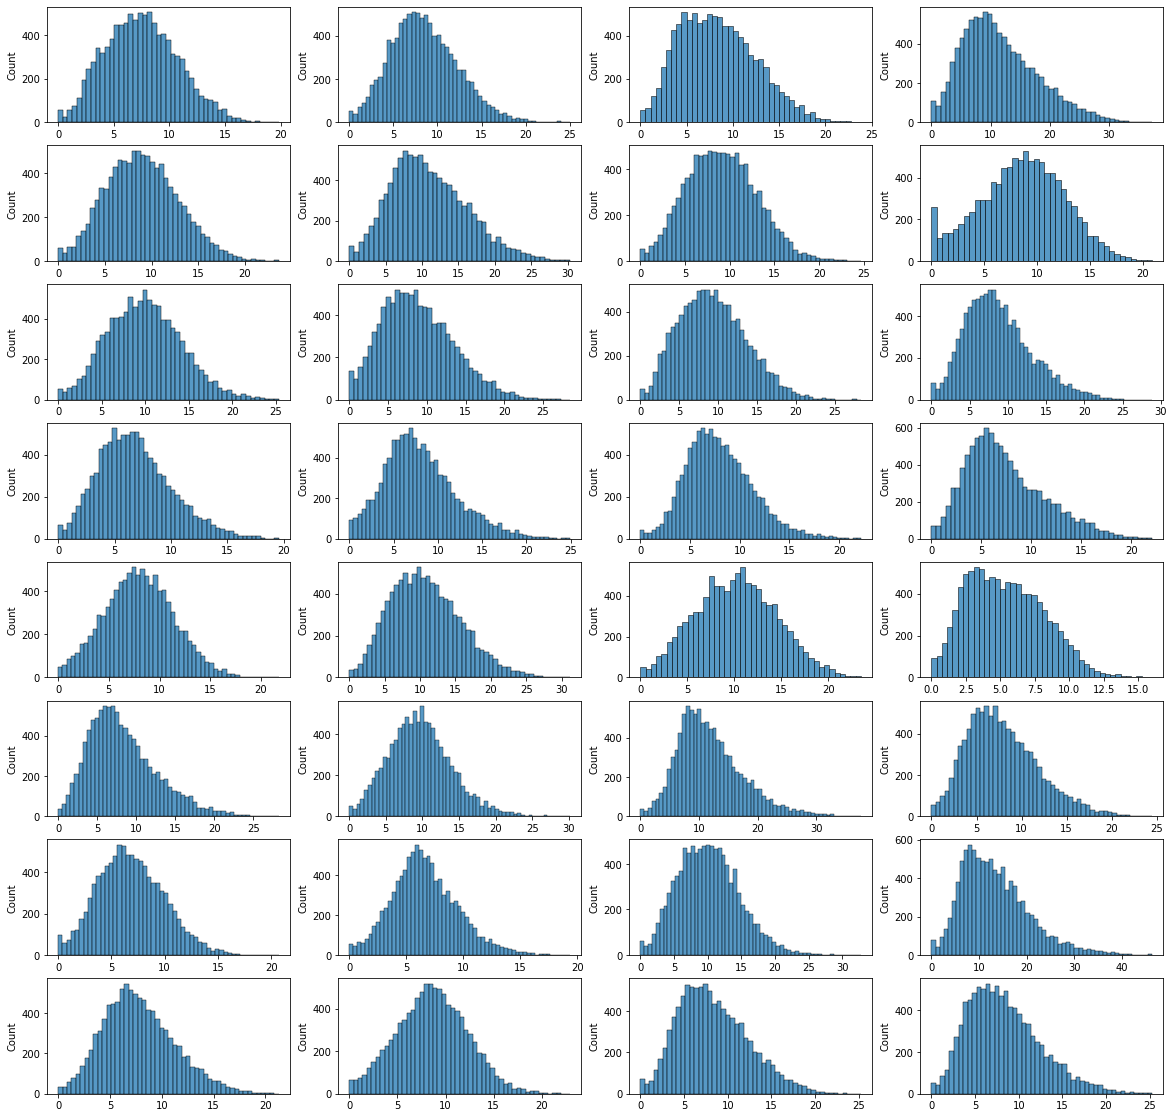

In [ ]:
print_distributions(32,gaussian)

#### From the above plot we can see that for the auto encoder which is created, the distirbutions vary for each neurons. Hence it does not have a standard range of values for each neurons, which we can manually feed to generate the output. Hence ,we are creating a variational auto encoder, with standardised outputs, which will help us to feed inputs manually and generate the data

# Deep Auto Encoder

In [19]:
def print_distributions(number_of_neurons, data):
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  plt.figure(figsize=(20,20))

  for i in range(number_of_neurons):
    plt.subplot(8,number_of_neurons//8,i+1)
    sns.histplot(data[i])
    
def print_decoder_outputs(input,predictions,number):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,3))
  for i in range(number):
    plt.subplot(1,number,i+1)
    plt.axis='off'
    plt.imshow(input[i].reshape(28,28),cmap='gray')
  plt.figure(figsize=(10,3))
  for i in range(number):
    plt.subplot(1,number,i+1)
    plt.axis='off'
    plt.imshow(predictions[i].reshape(28,28),cmap='gray')




## Training the model

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

import numpy as np
x_train = x_train/ 255.
x_test = x_test/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [23]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Creating model for encoding

encoder=keras.Model(input_img,encoded)
decoder=keras.Model(encoded,decoded)


autoencoder = keras.Model(input_img, decoded)


encoded_input=keras.Input(shape=(n_dimension,))
decoder=keras.Model(encoded_input,autoencoder_model.layers[-3](encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2417 - val_loss: 0.1648
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1505 - val_loss: 0.1367
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1316 - val_loss: 0.1258
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1226 - val_loss: 0.1178
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1164 - val_loss: 0.1119
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1115 - val_loss: 0.1081
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1084 - val_loss: 0.1058
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1059 - val_loss: 0.1033
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1037 - val_loss: 0.1015
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1018 - val_lo

In [24]:
decoded_imgs = autoencoder.predict(x_test)


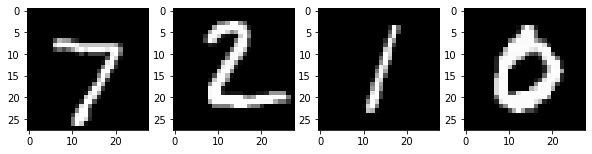

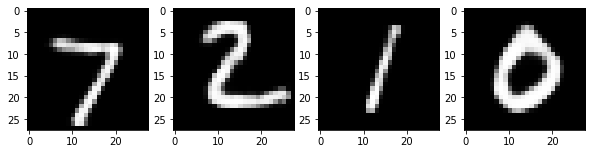

In [25]:
print_decoder_outputs(x_test,decoded_imgs,4)

#### Printing the autoencoder outputs with inputs

In [27]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


In [28]:
gaussian=[[] for i in range(32)] # Storing the outputs of individial neurons to different lists
for image in encoded_imgs:
  i=0
  for neuron_output in image:
    gaussian[i].append(neuron_output)
    i+=1


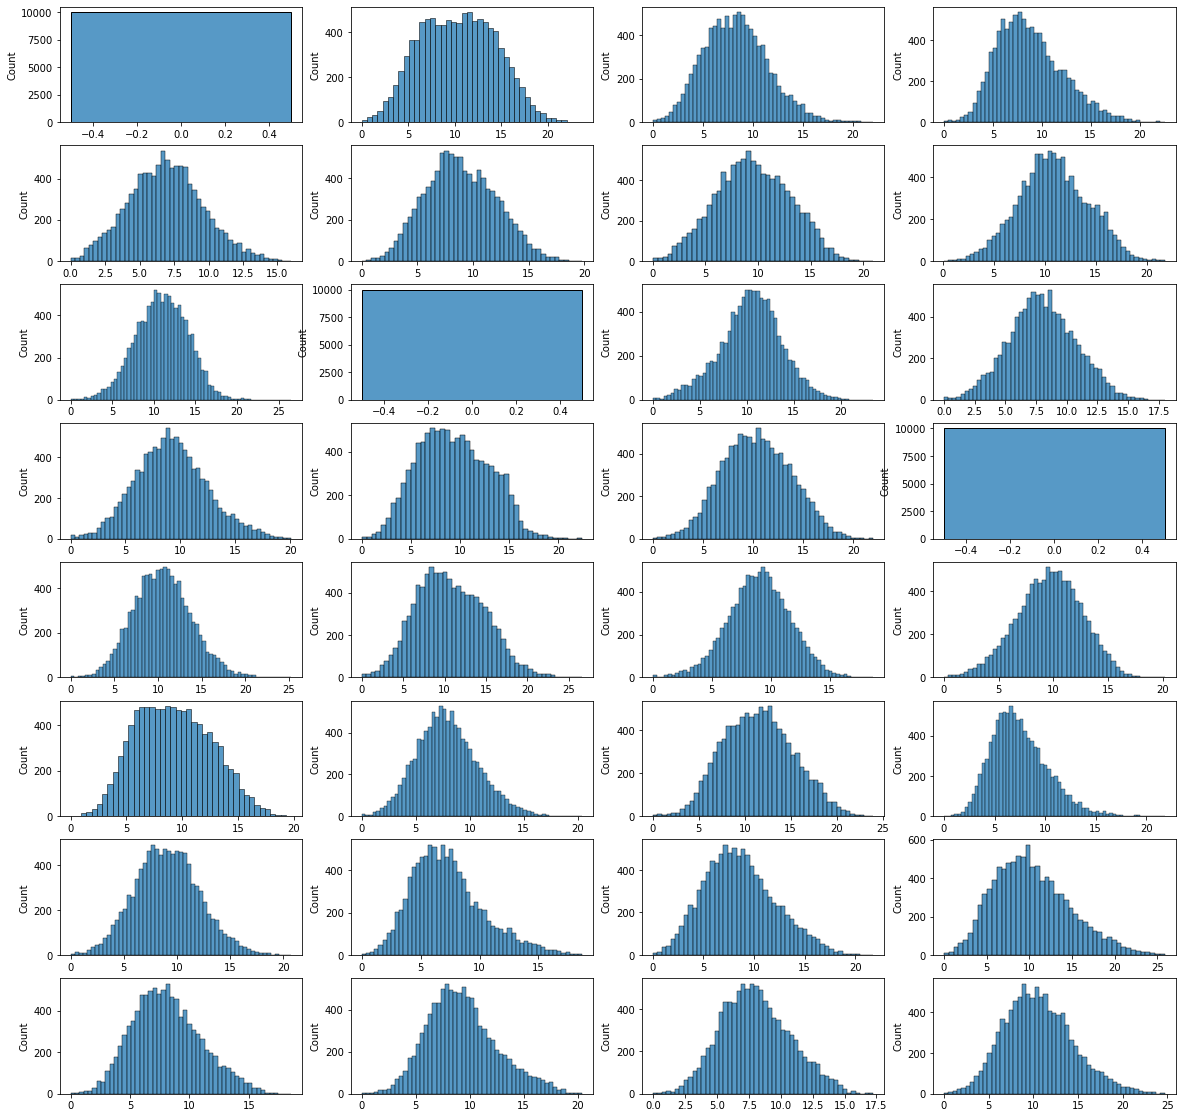

In [29]:
print_distributions(32,gaussian)

#### From the above plot we can see that for the auto encoder which is created, the distirbutions vary for each neurons. Hence it does not have a standard range of values for each neurons, which we can manually feed to generate the output. Hence ,we are creating a variational auto encoder, with standardised outputs, which will help us to feed inputs manually and generate the data